# Gustavo Gimpel Correia Lima
# Matrícula: 201512040488

# Questão 01

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

mat = loadmat('data2.mat')
xdata = mat['X']

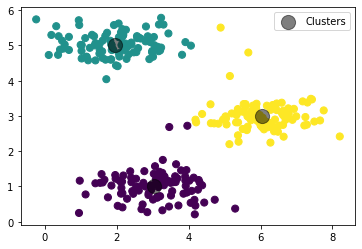

Clusters:  3
Inertia:  266.65851965491936


In [2]:
# 1.a)
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans = kmeans.fit(xdata)

plt.scatter(xdata[:,0],xdata[:,1], 
            c=kmeans.labels_, 
            s=50); 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            c='black', 
            s=200, 
            alpha=0.5, 
            label = 'Clusters');
plt.legend()
plt.show()

print('Clusters: ', len(kmeans.cluster_centers_))
print('Inertia: ', kmeans.inertia_)

In [3]:
# 1.b) e 1.c)
clusters = list()
inertias = list()
 
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(xdata)
    inertias.append(kmeans.inertia_)
    clusters.append(len(kmeans.cluster_centers_))

###### 1.d) Utilizando o método do cotovelo, o número ideal de clusters seriam 3, pois é onde termina a inflexão mais acentuada

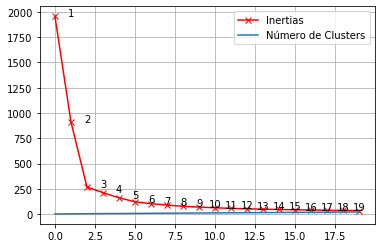

In [4]:
# 1.d)

fig, ax = plt.subplots()
ax.plot(inertias, 'r-x', label = "Inertias")
ax.plot(clusters, label = "Número de Clusters")
for x,y in zip(clusters, inertias):
    plt.annotate(x, (x,y), ha='center')
ax.legend()
ax.grid()
plt.show()

In [5]:
# 1.e) e 1.f)
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans = kmeans.fit(xdata)
complete = AgglomerativeClustering(n_clusters = 3, linkage='complete')
complete = complete.fit(xdata)
average = AgglomerativeClustering(n_clusters = 3, linkage='average')
average = average.fit(xdata)
single = AgglomerativeClustering(n_clusters = 3, linkage='single')
single = single.fit(xdata)
ward = AgglomerativeClustering(n_clusters = 3, linkage='ward')
ward = ward.fit(xdata)

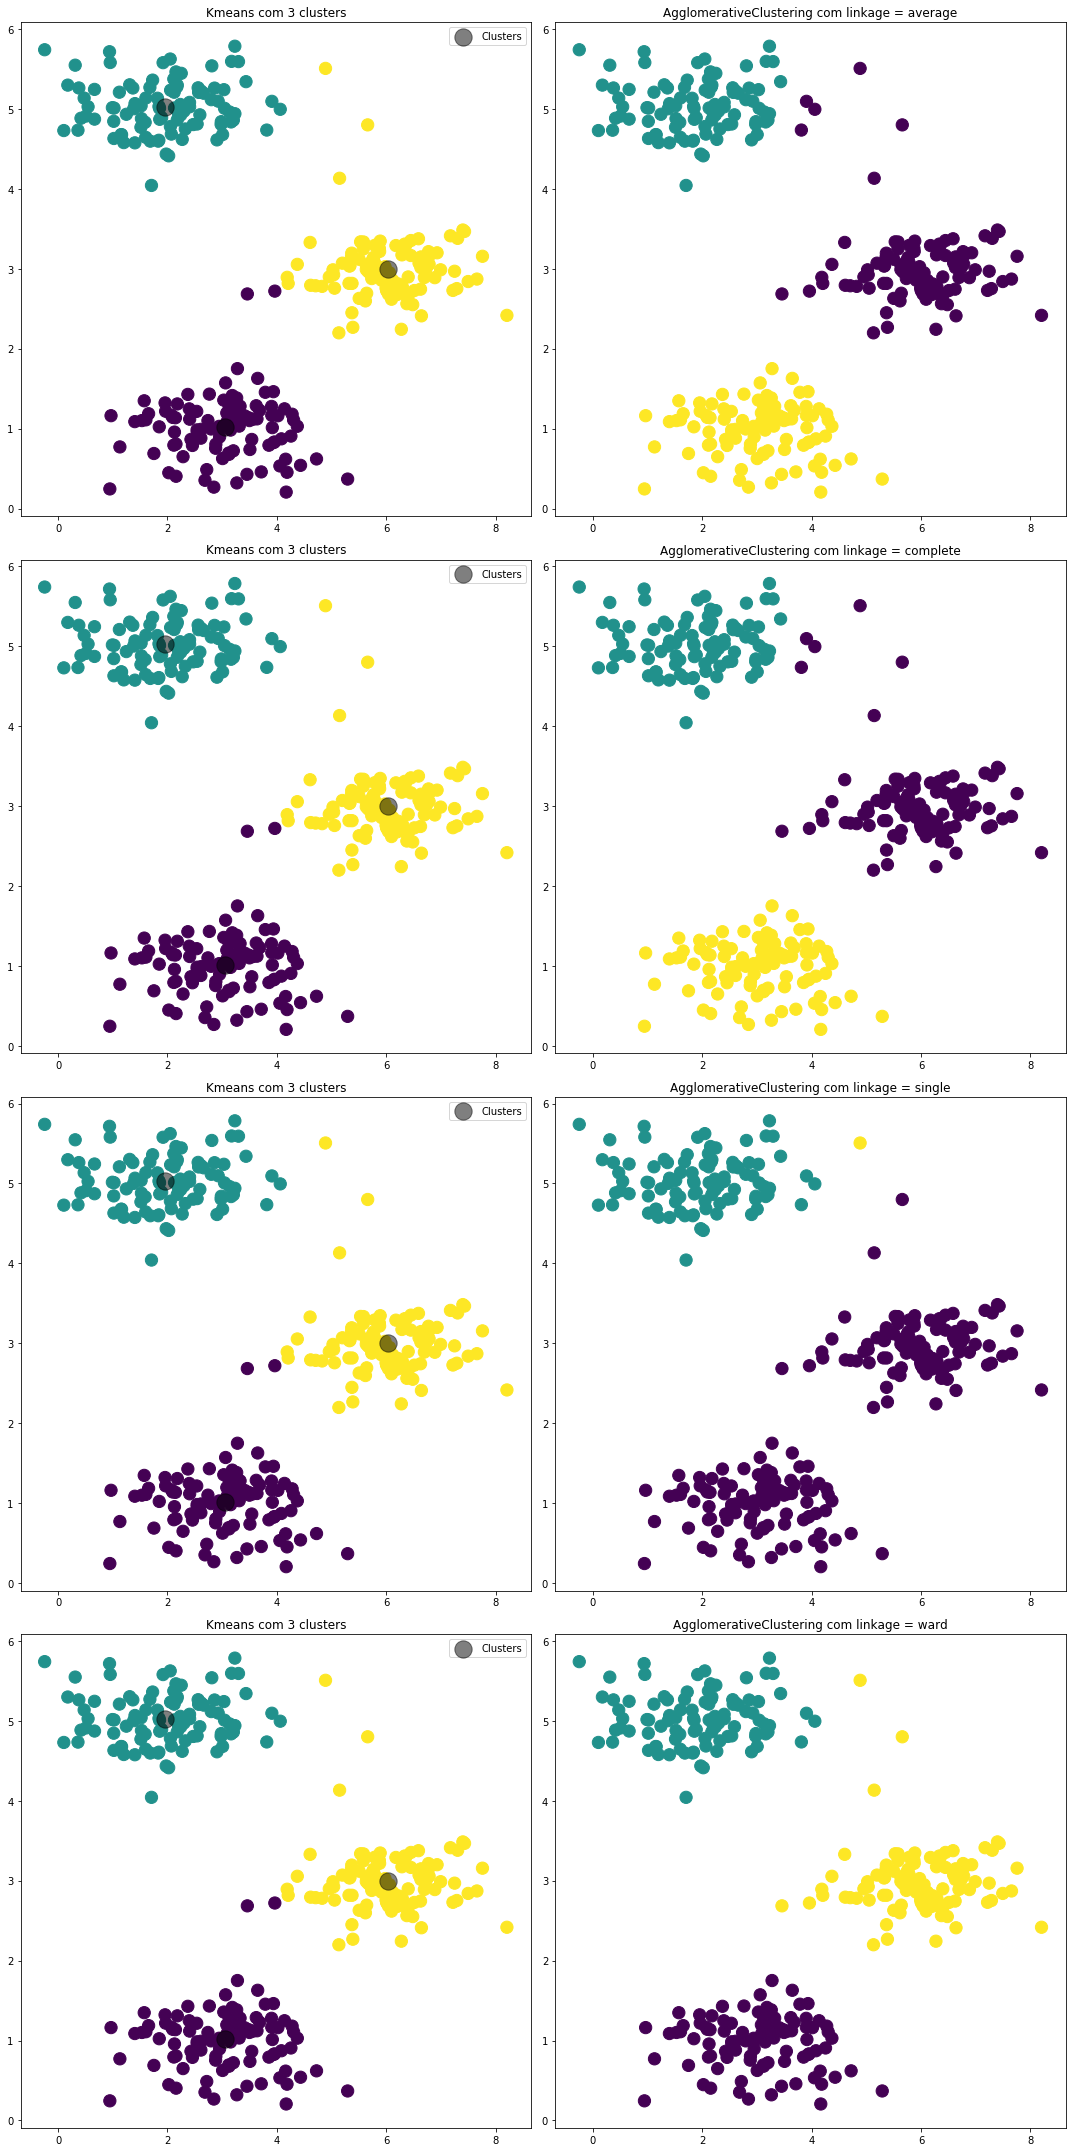

In [6]:
fig, axList = plt.subplots(nrows=4, ncols=2)
axList = axList.flatten()
fig.set_size_inches(15,30)
arrAggregative = [ward, single, complete, average]
arrNomesAggregative = ['ward', 'single', 'complete', 'average']

for i, model in enumerate(arrAggregative):
    # plt aggregative
    title = 'AgglomerativeClustering com linkage = '+arrNomesAggregative[i]
    lastAx, axList = axList[-1], axList[:-1]
    lastAx.set(title=title)
    lastAx.scatter(xdata[:,0],xdata[:,1], 
                   c=model.labels_, s=150);
    
    # plt kmeans
    title = 'Kmeans com 3 clusters'
    lastAx, axList = axList[-1], axList[:-1]
    lastAx.set(title=title)
    lastAx.scatter(xdata[:,0],xdata[:,1], 
                   c=kmeans.labels_, 
                   s=150); 
    lastAx.scatter(kmeans.cluster_centers_[:, 0], 
                   kmeans.cluster_centers_[:, 1], 
                   c='black', s=300, alpha=0.5, 
                   label = 'Clusters');
    lastAx.legend()

plt.tight_layout()

#### É possível observar que nenhum dos métodos de linkage gerou um resultado 100% satisfatório (visualmente), bem como o kmeans também não gerou, porém o que mais se adequou foi o ward. Pode-se observar que no Kmeans, há dois elementos que se aproximam consideravelmente do cluster amarelo, porém são classificados como do cluster roxo, enquanto no ward estes elementos são classificados mais adequadamente. Há alguns elementos que no complete e no average foram classificados como roxos apesar de sua proximidade com o cluster verde, enquanto no ward estes elementos foram adequadamentes clusterizados como verdes.

#### Chama a atenção o linkage='single', que produziu resultados bem insatisfatórios ao clusterizar apenas um único elemento como amarelo. Os demais métodos de linkagem apresentaram resultados satisfatórios e próximos, com pequenas diferenças.

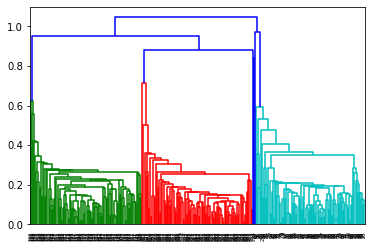

In [7]:
# 1.g)
link = linkage(xdata, 'single')
dendrogram(link)
plt.show()

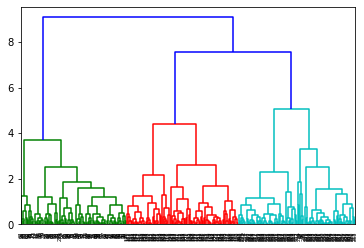

In [8]:
link = linkage(xdata, 'complete')
dendrogram(link)
plt.show()

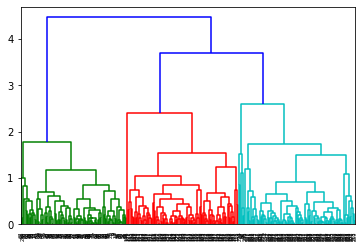

In [9]:
link = linkage(xdata, 'average')
dendrogram(link)
plt.show()

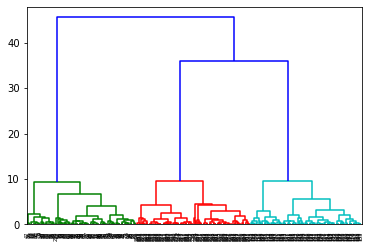

In [10]:
link = linkage(xdata, 'ward')
dendrogram(link)
plt.show()

# Questão 02

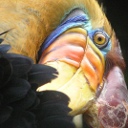

In [11]:
from PIL import Image
img = Image.open("bird_small.png")
img

In [12]:
pixels = np.asarray(img)

image_height = img.height
image_width = img.width
pixels = np.reshape(pixels, (image_height * image_width, 3))

pd.DataFrame(pixels, columns=["R", "G", "B"]).head()

,R,G,B
0,219,180,103
1,230,185,116
2,226,186,110
3,223,185,105
4,225,179,103


In [13]:
#KMeans com K=16 cores
kmeans = KMeans(n_clusters=16, init = 'k-means++')
kmeans.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
#Cria um array que irá atribuir cada posição de pixel ao seu centroide mais próximo. 
pixel_centroide = np.array([list(kmeans.cluster_centers_[label]) for label in kmeans.labels_])
#Convertendo o tipo do array obtido para inteiro positivo de 8 bits
pixel_centroide = pixel_centroide.astype("uint8")
#Redimensionando o array obtido de acordo com a altura e largura originais da imagem
pixel_centroide_reshaped = np.reshape(pixel_centroide, (image_height, image_width, 3), "C")

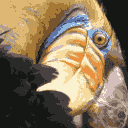

In [15]:
compressed_im = Image.fromarray(pixel_centroide_reshaped)
compressed_im